In [1]:
#written by Francis Osei Tutu Afrifa, 2023.

import numpy as np
import matplotlib.pyplot as plt
import gc

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

gc.collect()

8

### Let's define a Kohler function: ###

In [2]:
def Kohler_funct_exact(radius, m_solute, M_solute, m_solvent=18.02, density_solvent=1e3, i=None, T=283.15):
    '''
    Calculates the saturation vapor pressure for a solution drop of radius,r
    using the Kohler function (S_kohler)
    
    radius: In µm
            Droplet radius
            
    m_solute: In g/mol
            molar mass of solute.
            
    M_solute: In kg
            Mass of solute.
            
    m_solvent: In g/mol
            molar mass of solvent. Default solvent is water (18.02 g/mol) if not specified.
            
    density_solvent: In g/m^3
            density of the solvent. Defaults to water (1000 kg/m^3) if not specified.
            
    i: unitless (int)
        Van't hoff factor of solute
        
    T: In Kelvin
        Constant Temperature
    '''
    radius = radius * 1e-6
    surf_tension = 7.5 * 1e-2
    Rv = 482
    a = (2 * surf_tension) / (density_solvent * Rv * T)
    b = (3 * i * m_solvent * M_solute)/ (4 * np.pi * density_solvent * m_solute)
    
    S_kohler = (1 - (b / radius**3)) * np.exp(a / radius)
    
    r_critical = np.sqrt(3 * b / a)
    ### convert r* to µm ###
    r_critical = r_critical/1e-6
    
    S_kohler_critical = 1 + np.sqrt(4 * a**3 / 27 * b)
    
    return S_kohler, r_critical, S_kohler_critical


def Kohler_funct_approx(radius, m_solute, M_solute, m_solvent=18.02, density_solvent=1e3, i=None, T=283.15):
    '''
    Calculates the saturation vapor pressure for a solution drop of radius,r
    using the Kohler function (S_kohler)
    
    radius: In µm
            Droplet radius
            
    m_solute: In g/mol
            molar mass of solute.
    
    M_solute: In kg
            Mass of solute.
            
    m_solvent: In g/mol
            molar mass of solvent. Default solvent is water (18.02 g/mol) if not specified.
            
    density_solvent: In g/m^3
            density of the solvent. Defaults to water (1000 kg/m^3) if not specified.
            
    i: unitless (int)
        Van't hoff factor of solute
        
    T: In Kelvin
        Constant Temperature
    '''
    radius = radius * 1e-6
    surf_tension = 7.5 * 1e-2
    Rv = 482
    a = (2 * surf_tension) / (density_solvent * Rv * T)
    b = (3 * i * m_solvent * M_solute)/ (4 * np.pi * density_solvent * m_solute)
    
    S_kohler = (1 - (b / radius**3)) +  (a / radius)
    
    
    return S_kohler

In [3]:
radii = 10**(np.arange(-2,1.02, 0.02))

### PLOT 1 ###

1. In plot (1) and plot (1a), demonstrate that for typical sizes of CCN and cloud droplets the exact solution (with factor ‘exp{a/r}’) is reasonably approximated by the more common form in Eqn 1 (above). Assume 10-16 g of NaCl.

        a. Plot (1): plot the exact solution in blue and the approximation in red. The xaxis (radius) should range from 0.05 to 10 µm on a log scale and the saturation ratio (y-axis) should range from 0.90 to 1.01.

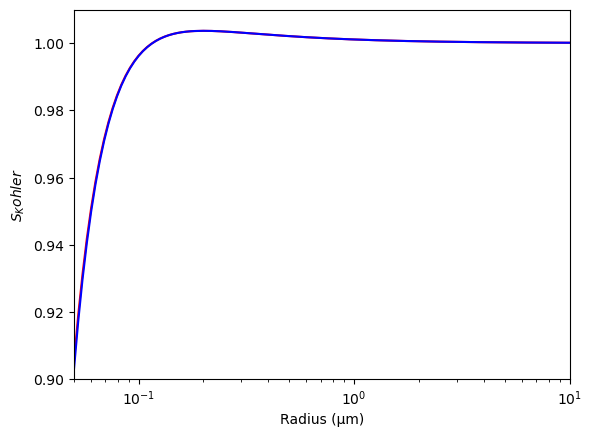

In [138]:
plt.plot(radii, Kohler_funct_approx(radii, 58.44, 1e-19, i=2), color='r')
plt.plot(radii, Kohler_funct_exact(radii, 58.44, 1e-19, i=2)[0], color = 'b')
plt.xscale('log')
plt.xlim(0.05,10); plt.ylim(0.9, 1.01)
plt.xlabel('Radius (µm)'); plt.ylabel(f'$S_Kohler$')
#plt.savefig('./%s.png' %('Lab3-Afrifa-Fig1'),bbox_inches='tight',dpi=100)

**b.  Plot (1a): plot the percent error from the approximate as a function of 
droplet radius over the same range of radii. Select a y-axis range from -0.01 
to +0.01**

In [9]:
error = (Kohler_funct_exact(radii, 58.44, 1e-19, i=2)[0]-Kohler_funct_approx(radii, 58.44, 1e-19, i=2))/Kohler_funct_exact(radii, 58.44, 1e-19, i=2)[0]
error

array([ 1.11258657e-01,  1.07633485e-01,  1.04294522e-01,  1.01253976e-01,
        9.85288440e-02,  9.61425254e-02,  9.41271426e-02,  9.25269857e-02,
        9.14037594e-02,  9.08448383e-02,  9.09767597e-02,  9.19882804e-02,
        9.41719688e-02,  9.80043927e-02,  1.04314332e-01,  1.14676963e-01,
        1.32490354e-01,  1.66670702e-01,  2.50466899e-01,  7.02297993e-01,
       -5.46544429e-01, -1.68971997e-01, -9.07151531e-02, -5.75809304e-02,
       -3.96561184e-02, -2.86533320e-02, -2.13611683e-02, -1.62752406e-02,
       -1.25979489e-02, -9.86774697e-03, -7.79957902e-03, -6.20832212e-03,
       -4.96887624e-03, -3.99394648e-03, -3.22099663e-03, -2.60424145e-03,
       -2.10954458e-03, -1.71106237e-03, -1.38897454e-03, -1.12791234e-03,
       -9.15846690e-04, -7.43286946e-04, -6.02693905e-04, -4.88043480e-04,
       -3.94498120e-04, -3.18156499e-04, -2.55860863e-04, -2.05047397e-04,
       -1.63629066e-04, -1.29903209e-04, -1.02478201e-04, -8.02149238e-05,
       -6.21798101e-05, -

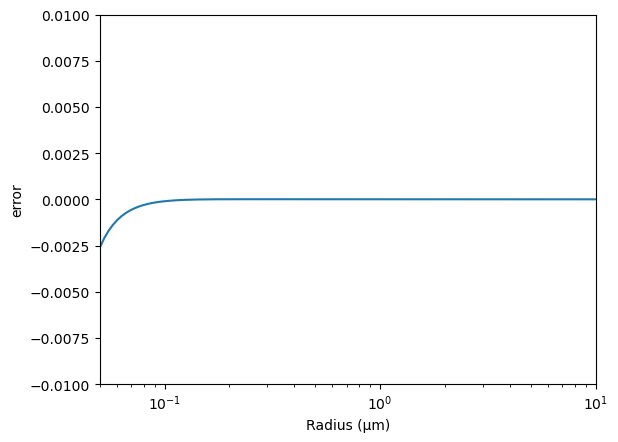

In [139]:
plt.plot(radii, error)
plt.xscale('log')
plt.xlim(0.05,10); plt.ylim(-0.01,0.01)
plt.xlabel('Radius (µm)'); plt.ylabel(f'error')
#plt.savefig('./%s.png' %('Lab3-Afrifa-Fig1a'),bbox_inches='tight',dpi=100)

### PLOT 2 ###

2. In plot (2) we will examine how a droplet (initially not at equilibrium) will respond to its environment.
     
        a. Plot (2): plot the exact solution in a thick black line for 5 X 10-17 g of NaCl. Use the same scale/range for radius, but zoom in on the y-axis, ranging from 0.98 to 1.01.

        b. Locate and indicate on your graph the critical radius and critical saturation ratio. Use the formulas: r* = SQRT(3b/a) and S* = 1 + SQRT(4a^3/27b). Draw a vertical line from the bottom of your graph to the critical radius and a horizontal line from the y-axis to the critical saturation ratio. Label the area bounded by lines you just drew on the bottom and left side of your graph as A. Extend the horizontal line all the way across the graph. Label the region on the bottom and right side of your graph as B. Label the area above the horizontal line as C.

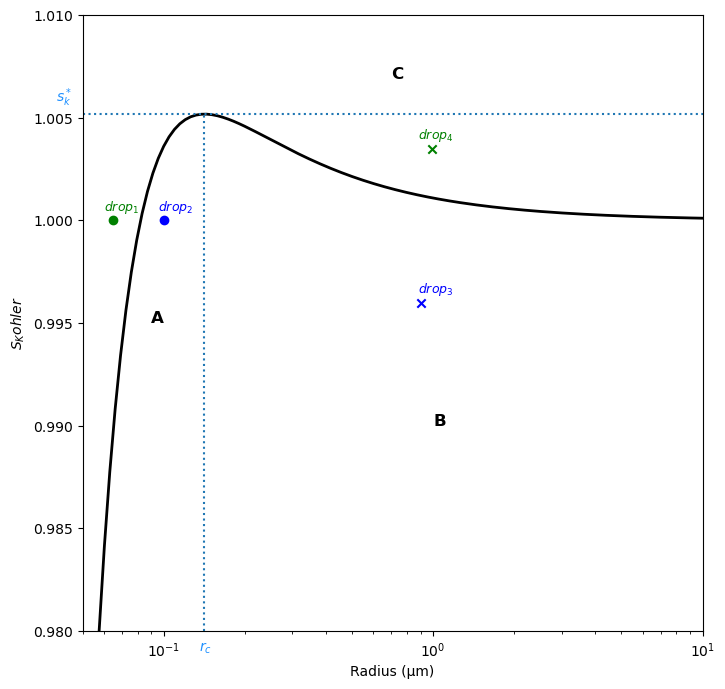

In [143]:
plt.figure(figsize=(8,8))
#plt.plot(radii, Kohler_funct_approx(radii, 58.44, 1e-19, i=2), color='r')
S_Kohler, r_crit, S_Kohler_crit = Kohler_funct_exact(radii, 58.44, 5*1e-20, i=2)
plt.plot(radii, S_Kohler, color = 'k', lw=2)
plt.xscale('log')
#plt.axvline(x=1.4e-1, ymin=0, ymax = 0.84, linestyle='dashed')
plt.axvline(x=r_crit, ymin=0, ymax = 0.84, linestyle='dotted')
plt.axhline(y = Kohler_funct_exact(r_crit, 58.44, 5*1e-20, i=2)[0], xmin = 0, xmax=1e1, linestyle='dotted')
plt.xlim(0.05,10); plt.ylim(0.98, 1.01)
plt.xlabel('Radius (µm)'); plt.ylabel(f'$S_Kohler$')
plt.text(x=0.9e-1, y=0.995, s= 'A', fontweight='bold', fontsize=12); plt.text(x=1, y=0.99, s= 'B', fontweight='bold', fontsize=12)
plt.text(x=0.7, y=1.0069, s= 'C', fontweight='bold', fontsize=12)
plt.text(x=1.35e-1, y = 0.979, s='$r_c$', color='dodgerblue'); plt.text(x=.4e-1, y = 1.0058, s='$s_k^*$', color='dodgerblue')
plt.scatter(x=0.65e-1, y=1, marker='o', color='g'); plt.text(x=0.6e-1, y = 1.0005, s='$drop_1$', color='g', fontsize=9)
plt.scatter(x=1e-1, y=1, marker='o', color='b'); plt.text(x=.95e-1, y = 1.0005, s='$drop_2$', color='b', fontsize=9)

plt.scatter(x=9e-1, y=0.996, marker='x', color='b'); plt.text(x=8.8e-1, y = 0.9965, s='$drop_3$', color='b', fontsize=9)
plt.scatter(x=9.9e-1, y=1.0035, marker='x', color='g'); plt.text(x=8.8e-1, y = 1.004, s='$drop_4$', color='g', fontsize=9)
plt.savefig('./%s.png' %('Lab3-Afrifa-Fig2'),bbox_inches='tight',dpi=100)
plt.show()

### PLOT 3 ###

**3. In plot (3) we will examine how solute (CCN) mass impacts Kohler curves.**
    
    a. Plot (3): Create a ‘family’ of three Kohler curves for NaCl overlaid on the 
    same graph. Plot in red: 10-16 g, in green 10-15 g, and in blue 10-14 g. Use a y-axis range of 0.99 to 1.005/

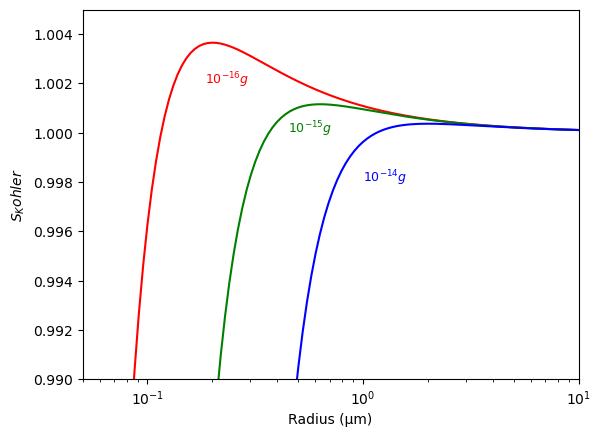

In [141]:
plt.plot(radii, Kohler_funct_approx(radii, 58.44, 1e-19, i=2), color='r')
plt.text(x=1.85e-1, y=1.002, s= '$10^{-16}g$', fontweight='bold', fontsize=9, color='r')

plt.plot(radii, Kohler_funct_approx(radii, 58.44, 1e-18, i=2), color = 'g')
plt.text(x=4.5e-1, y=1, s= '$10^{-15}g$', fontweight='bold', fontsize=9, color='g')

plt.plot(radii, Kohler_funct_approx(radii, 58.44, 1e-17, i=2), color = 'b')
plt.text(x=1, y=0.998, s= '$10^{-14}g$', fontweight='bold', fontsize=9, color='b')

plt.xscale('log')
plt.xlim(0.05,10); plt.ylim(0.99, 1.005)
plt.xlabel('Radius (µm)'); plt.ylabel(f'$S_Kohler$')

#plt.savefig('./%s.png' %('Lab3-Afrifa-Fig3'),bbox_inches='tight',dpi=100)
plt.show()

### PLOT 4 ###

**4. In plot (4) we will examine how different substances impact Kohler curves.**

    a. Plot (4): Create two Kohler curves on the same graph. For both consider 10-15
    g of solute. In blue, plot the Kohler curve for Sodium Chloride (NaCl). In 
    green, plot the Kohler curve for Ammonium Sulfate (NH4)2SO4. Use the same 
    rang as plot 3.

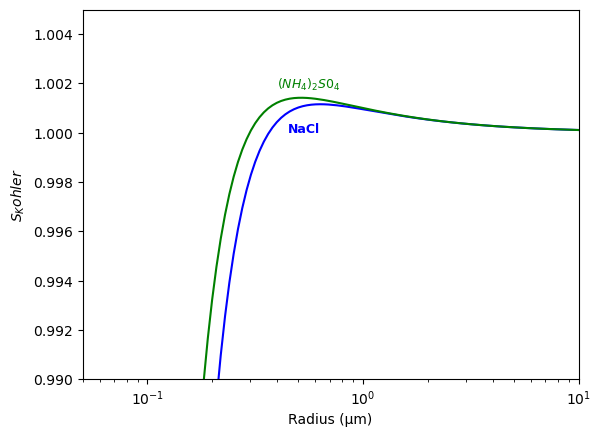

In [142]:
### For Sodium chloride
plt.plot(radii, Kohler_funct_approx(radii, 58.44, 1e-18, i=2), color='b')
plt.text(x=4.5e-1, y=1., s= 'NaCl', fontweight='bold', fontsize=9, color='b')

### For Ammonium Sulphate
plt.plot(radii, Kohler_funct_approx(radii, 132.14, 1e-18, i=3), color = 'g')
plt.text(x=4e-1, y=1.0018, s= '$(NH_4)_2 S0_4$', fontweight='bold', fontsize=9, color='g')

plt.xscale('log')
plt.xlim(0.05,10); plt.ylim(0.99, 1.005)
plt.xlabel('Radius (µm)'); plt.ylabel(f'$S_Kohler$')

#plt.savefig('./%s.png' %('Lab3-Afrifa-Fig4'),bbox_inches='tight',dpi=100)
plt.show()